# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [4]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

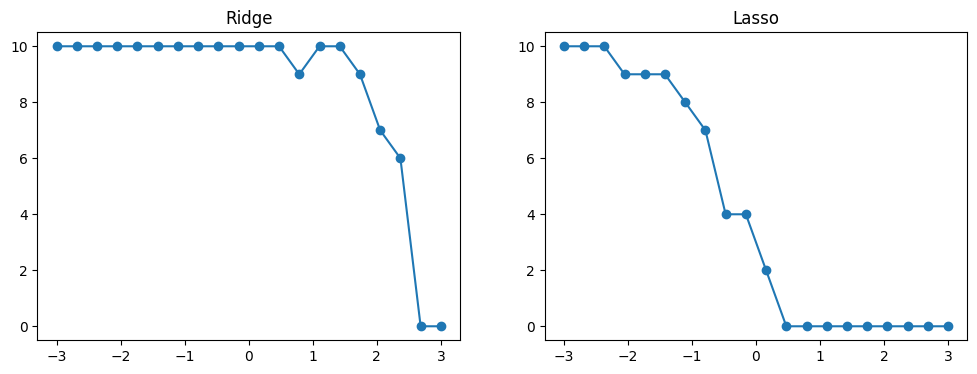

In [17]:
a = np.logspace(-3, 3, num=20)
size = len(a)
c_ridge = np.zeros(size)
c_lasso = np.zeros(size)
for i in range(size):
    model = Ridge(alpha=a[i])
    for coef in model.fit(X_train, y_train).coef_:
        if (abs(coef) > 2):
            c_ridge[i] += 1

    model = Lasso(alpha=a[i])
    for coef in model.fit(X_train, y_train).coef_:
        if (abs(coef) > 2):
            c_lasso[i] += 1

plt.figure(figsize=[12, 4])
a = np.log10(a)

plt.subplot(1, 2, 1)
plt.plot(a, c_ridge, marker='o')
plt.title("Ridge")

plt.subplot(1, 2, 2)
plt.plot(a, c_lasso, marker='o')
plt.title("Lasso")
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print('RMSE: ', (mean_squared_error(y_test, ridge.predict(X_test))) ** 0.5)
print('MAE: ', mean_absolute_error(y_test, ridge.predict(X_test)))
print('R^2: ', r2_score(y_test, ridge.predict(X_test)))

RMSE:  58.30429511391227
MAE:  49.602750809651916
R^2:  0.3599020220009461


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

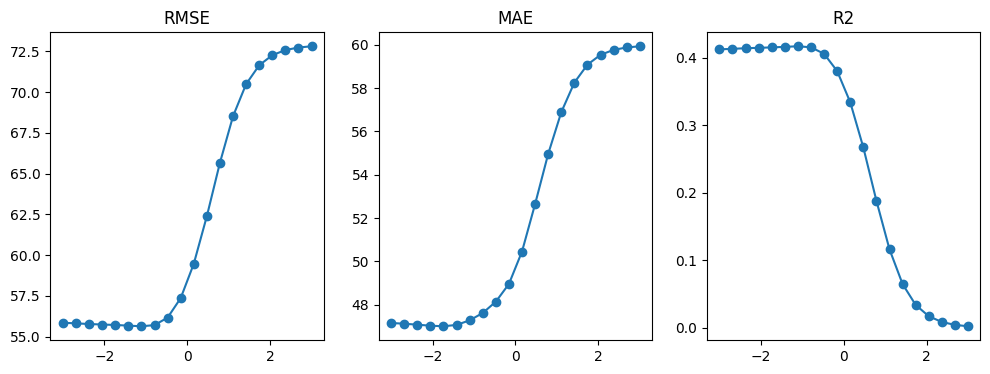

new RMSE:  55.64176122404913
new MAE:  47.375463757061304
new R^2:  0.41702880920983465


In [22]:
a = np.logspace(-3, 3, num=20)
size = len(a)
RMSE = [0] * size
MAE = [0] * size
R2 = [0] * size
for i in range(size):
    ridge = Ridge(alpha=a[i])
    ridge.fit(X_train, y_train)
    RMSE[i] = mean_squared_error(y_test, ridge.predict(X_test)) ** 0.5
    MAE[i] = mean_absolute_error(y_test, ridge.predict(X_test))
    R2[i] = r2_score(y_test, ridge.predict(X_test))
a = np.log10(a)
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1)
plt.plot(a, RMSE, marker='o')
plt.title("RMSE")

plt.subplot(1, 3, 2)
plt.plot(a, MAE, marker='o')
plt.title("MAE")

plt.subplot(1, 3, 3)
plt.plot(a, R2, marker='o')
plt.title("R2")
plt.show()

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print('new RMSE: ', (mean_squared_error(y_test, ridge.predict(X_test))) ** 0.5)
print('new MAE: ', mean_absolute_error(y_test, ridge.predict(X_test)))
print('new R^2: ', r2_score(y_test, ridge.predict(X_test)))

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([131.,  37.,  31.,  21.,  11.,  11.,  12.,  10.,   5.,   8.,   5.,
          6.,   3.,   3.,   4.,   3.,   2.,   0.,   0.,   2.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([8.85150216e-02, 8.09066306e+02, 1.61804410e+03, 2.42702189e+03,
        3.23599968e+03, 4.04497747e+03, 4.85395526e+03, 5.66293305e+03,
        6.47191084e+03, 7.28088863e+03, 8.08986642e+03, 8.89884421e+03,
        9.70782200e+03, 1.05167998e+04, 1.13257776e+04, 1.21347554e+04,
        1.29437332e+04, 1.37527110e+04, 1.45616887e+04, 1.53706665e+04,
        1.61796443e+04, 1.69886221e+04, 1.77975999e+04, 1.86065777e+04,
        1.94155555e+04, 2.02245333e+04, 2.10335111e+04, 2.18424889e+04,
        2.26514667e+04, 2.34604444e+04, 2.42694222e+04]),
 <BarContainer object of 30 artists>)

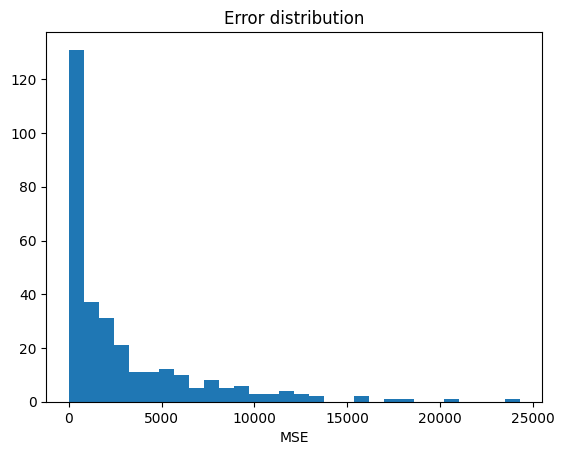

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
MSE = [0] * len(X_train)

for i in range(len(X_train)):
    MSE[i] = mean_squared_error([y_train[i]], [y_train_pred[i]])

plt.title("Error distribution")
plt.xlabel('MSE')
plt.hist(MSE, bins=30)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.5, random_state=1024)
X_train2 = []
y_train2 = []

for i in range(len(X_train)):
    MSE = mean_squared_error([y_train[i]], [y_train_pred[i]])
    if MSE < 100000:
        X_train2.append(X_train[i])
        y_train2.append(y_train[i])
X_train = X_train2
y_train = y_train2

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print('new RMSE: ', (mean_squared_error(y_test, ridge.predict(X_test))) ** 0.5)
print('new MAE: ', mean_absolute_error(y_test, ridge.predict(X_test)))
print('new R^2: ', r2_score(y_test, ridge.predict(X_test)))

new RMSE:  55.237404675520104
new MAE:  45.258443156427845
new R^2:  0.42981463797782526


__Задание 3.__ Отчёт

**(2 балла)**

Вывод:
В ходе обучения модели линейной регрессии Ridge было выявлено, что эффективность зависит от коэффицента регуляризации (в данном случае ~ 0.1), но все равно не сильно изменяет показатели ошибок. Удаление выбросов также не сильно улучшило показатели.
